# Detecting text in natural scenes

In this recipe, you will learn how to detect text in natural images using a pre-trained convolutional neural network model. Detecting text in natural environments is important in applications like reading traffic sign messages, understanding ad messages, and reading banners.

Before you proceed with this recipe, you will need to install the OpenCV 3.x Python API package and the matplotlib package. OpenCV must be built with contrib modules, because the advanced text recognition functionality isn't a part of the main OpenCV repository.

The modified .prototxt file with the model description for this recipe can be found at opencv_contrib/modules/text/samples/textbox.prototxt. 
 
The model weights can be downloaded from 
https://www.dropbox.com/s/g8pjzv2de9gty8g/TextBoxes_icdar13.caffemodel?dl=0. 

There are many different text detection methods implemented in OpenCV. In this recipe, you learned how to use a state-of-the-art deep learning approach for detecting text bounding boxes. The OpenCV class `cv2.TextDetectorCNN_create` creates a CNN (convolutional neural network) model, and loads its pre-trained weights from a specified file. After that, you only need to call the `det.detect` method, which returns a list of rectangles with the associated probabilities of rectangles containing text.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S04\env


[Text Detection and Extraction using OpenCV and OCR](https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/)

[Pytesseract : “TesseractNotFound Error: tesseract is not installed or it's not in your path”, how do I fix this?](https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i)

# [A comprehensive guide to OCR with Tesseract, OpenCV and Python](https://nanonets.com/blog/ocr-with-tesseract/)

------  image--------------------    Shape(745, 840, 3) image: uint8
[ [2 2 2] [0 0 0] [184 184 184] [255 255 255] [253 253 253] [97 97 97] [0 0 0] ]
[ [157 157 157] [112 112 112] [249 249 249] [255 255 255] [252 252 252] [122 122 122] [0 0 0] ]
------  image_gray---------------    Shape(745, 840) image_gray: uint8
[ 2 0 184 255 253 97 0 ]
[ 157 112 249 255 252 122 0 ]
------  image_thresh-------------    Shape(745, 840) image_thresh: uint8
[ 0 0 255 255 255 0 0 ]
[ 255 0 255 255 255 0 0 ]
------  image_opening------------    Shape(745, 840) image_opening: uint8
[ 2 0 0 0 0 0 0 ]
[ 157 112 112 112 112 112 0 ]
------  image_canny--------------    Shape(745, 840) image_canny: uint8
[ 0 255 0 0 255 255 0 ]
[ 255 255 0 0 0 255 0 ]


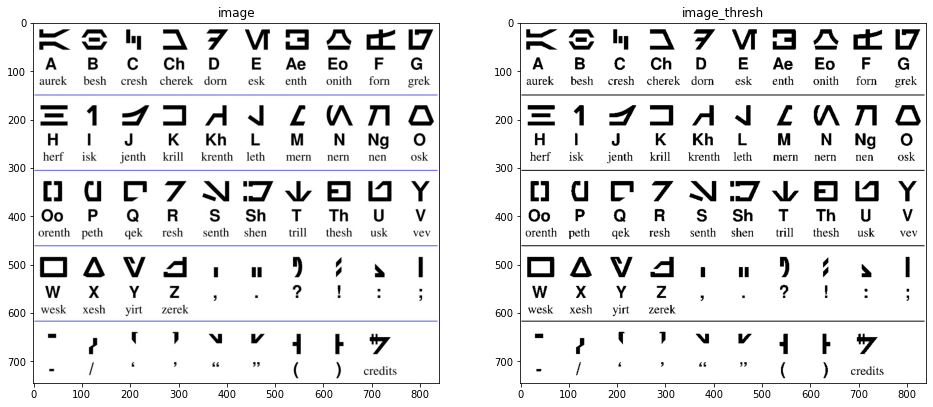

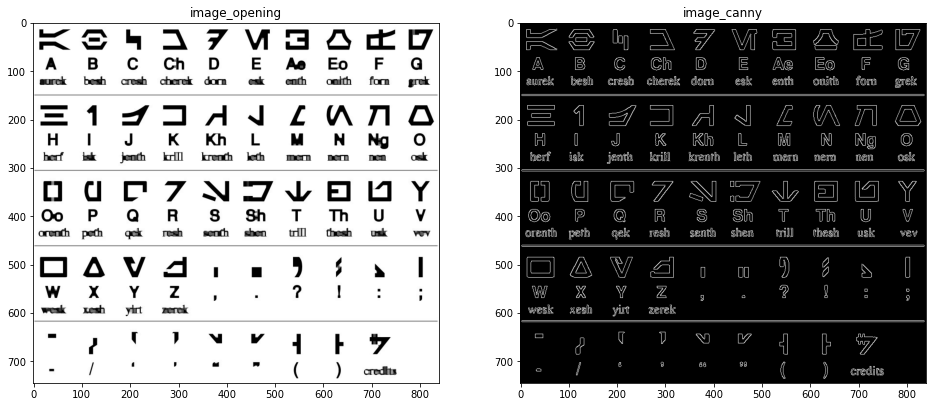

In [2]:
# Import required packages 
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('data/aurebesh.jpg')

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel = np.ones((5,5),np.uint8)
image_opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)

image_canny = cv2.Canny(image_gray, 100, 200)


##########################################################
print_image('image','image',image,118,120,190,197)
print_image('image_gray','image_gray',image_gray,118,120,190,197)
print_image('image_thresh','image_thresh',image_thresh,118,120,190,197)
print_image('image_opening','image_opening',image_opening,118,120,190,197)
print_image('image_canny','image_canny',image_canny,118,120,190,197)
plt_view_image(plt,[["image",image],["image_thresh",image_thresh]],
               figsize=(16,8), axis='on', cmap='gray')
plt_view_image(plt,[["image_opening",image_opening], ["image_canny",image_canny]],
               figsize=(16,8), axis='on', cmap='gray')

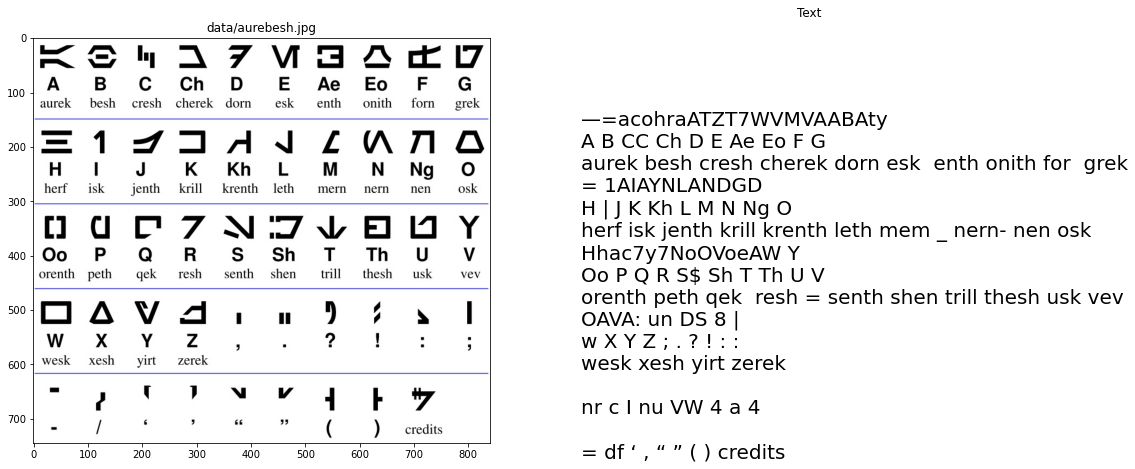

In [3]:
import pytesseract 
# Mention the installed location of Tesseract-OCR in your system 
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

# Adding custom options
custom_config = r'--oem 3 --psm 6'
image_text = pytesseract.image_to_string(image, config=custom_config)


############################################
#print(text)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.axis('on')
plt.title("data/aurebesh.jpg")
plt.imshow(image,cmap='gray' )
plt.subplot(1,2,2)
plt.axis('off')
plt.title("Text")
plt.text(0, 0, image_text, fontsize=20)
#plt.imshow(image,cmap='gray' )
plt.show()

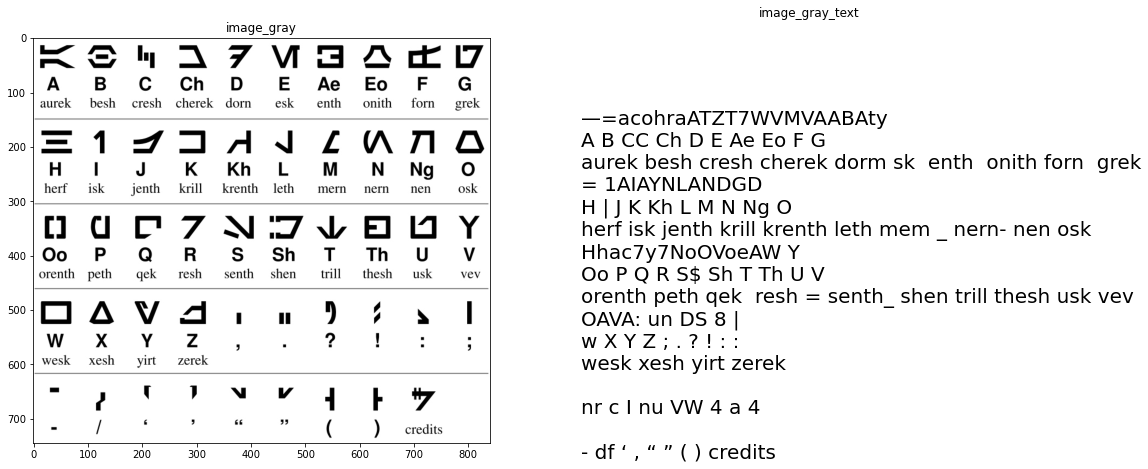

In [4]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
image_gray_text = pytesseract.image_to_string(image_gray, config=custom_config)


#############################################print(image_gray_text)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.axis('on')
plt.title("image_gray")
plt.imshow(image_gray,cmap='gray' )
plt.subplot(1,2,2)
plt.axis('off')
plt.title("image_gray_text")
plt.text(0, 0, image_gray_text, fontsize=20)
plt.show()

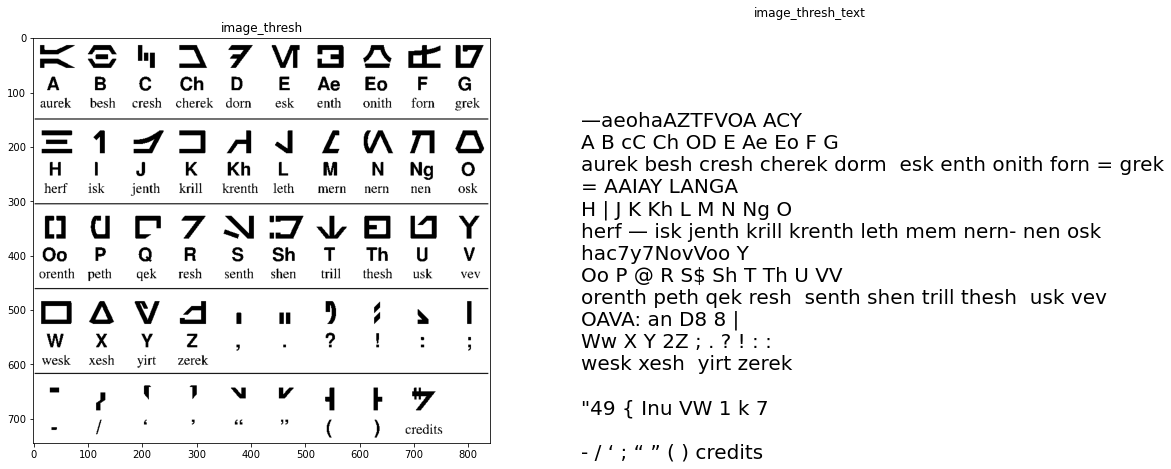

In [5]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
image_thresh_text = pytesseract.image_to_string(image_thresh, config=custom_config)


#############################################print(image_thresh_text)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.axis('on')
plt.title("image_thresh")
plt.imshow(image_thresh,cmap='gray' )
plt.subplot(1,2,2)
plt.axis('off')
plt.title("image_thresh_text")
plt.text(0, 0, image_thresh_text, fontsize=20)
plt.show()

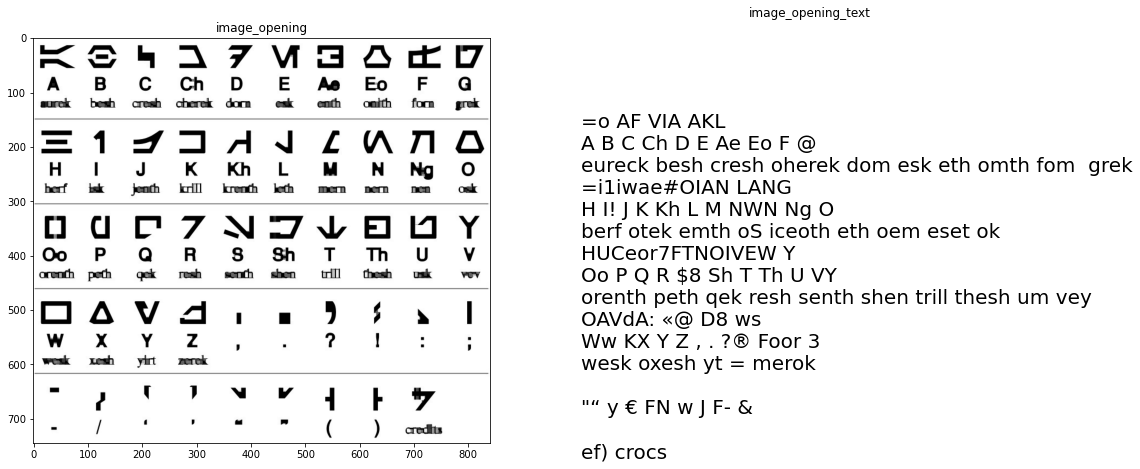

In [6]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
image_opening_text = pytesseract.image_to_string(image_opening, config=custom_config)


#############################################print(image_opening_text)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.axis('on')
plt.title("image_opening")
plt.imshow(image_opening,cmap='gray' )
plt.subplot(1,2,2)
plt.axis('off')
plt.title("image_opening_text")
plt.text(0, 0, image_opening_text, fontsize=20)
plt.show()

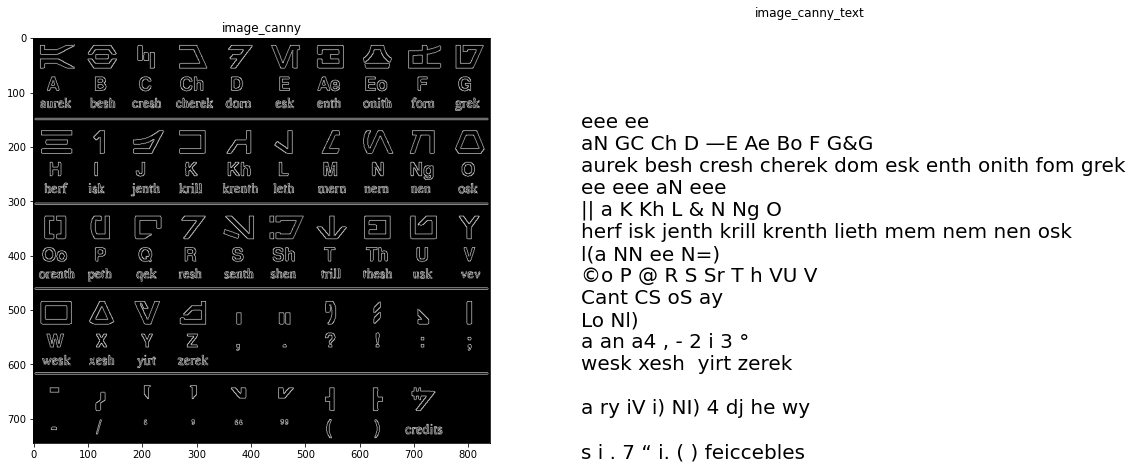

In [7]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
image_canny_text = pytesseract.image_to_string(image_canny, config=custom_config)


#############################################print(image_canny_text)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.axis('on')
plt.title("image_canny")
plt.imshow(image_canny,cmap='gray' )
plt.subplot(1,2,2)
plt.axis('off')
plt.title("image_canny_text")
plt.text(0, 0, image_canny_text, fontsize=20)
plt.show()

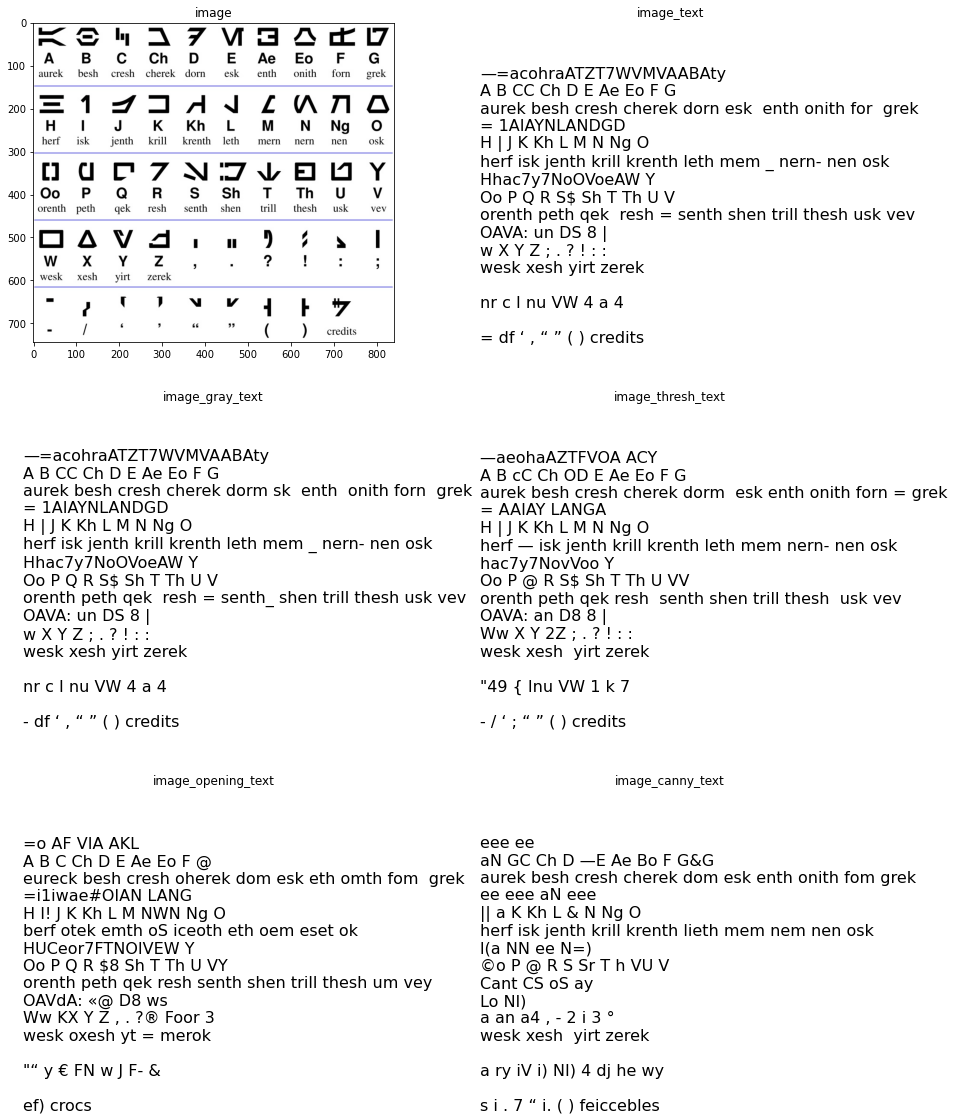

In [8]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
plt.axis('on')
plt.title("image")
plt.imshow(image,cmap='gray' )
plt.subplot(3,2,2)
plt.axis('off')
plt.title("image_text")
#plt.text(0, 0, image_text, fontsize=20, verticalalignment='bottom')
plt.text(0, 0, image_text, fontsize=16)
plt.subplot(3,2,3)
plt.axis('off')
plt.title("image_gray_text")
plt.text(0, 0, image_gray_text, fontsize=16)
plt.subplot(3,2,4)
plt.axis('off')
plt.title("image_thresh_text")
plt.text(0, 0, image_thresh_text, fontsize=16)
plt.subplot(3,2,5)
plt.axis('off')
plt.title("image_opening_text")
plt.text(0, 0, image_opening_text, fontsize=16)
plt.subplot(3,2,6)
plt.axis('off')
plt.title("image_canny_text")
plt.text(0, 0, image_canny_text, fontsize=16)
plt.show()

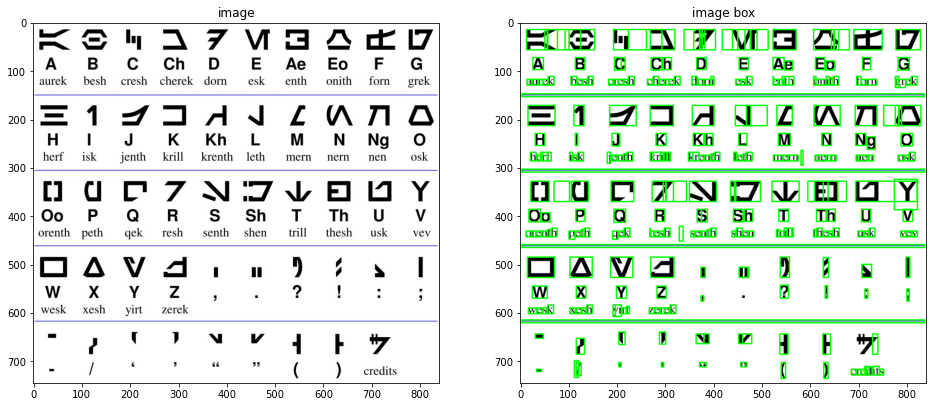

In [9]:
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
image_box = np.copy(image)
for b in boxes.splitlines():
    b = b.split(' ')
    image_box = cv2.rectangle(image_box, (int(b[1]), h - int(b[2])), 
                              (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

############################################################
plt_view_image(plt,[["image",image],["image box",image_box]],figsize=(16,8), axis='on', cmap='gray')

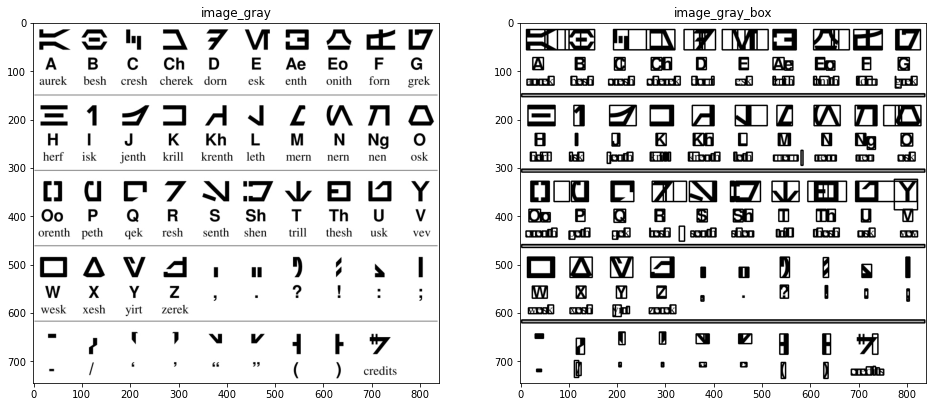

In [10]:
h, w = image_gray.shape
boxes = pytesseract.image_to_boxes(image_gray) 
image_gray_box = np.copy(image_gray)
for b in boxes.splitlines():
    b = b.split(' ')
    image_gray_box = cv2.rectangle(image_gray_box, (int(b[1]), h - int(b[2])), 
                              (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

############################################################
plt_view_image(plt,[["image_gray",image_gray],
                    ["image_gray_box",image_gray_box]],
               figsize=(16,8), axis='on', cmap='gray')

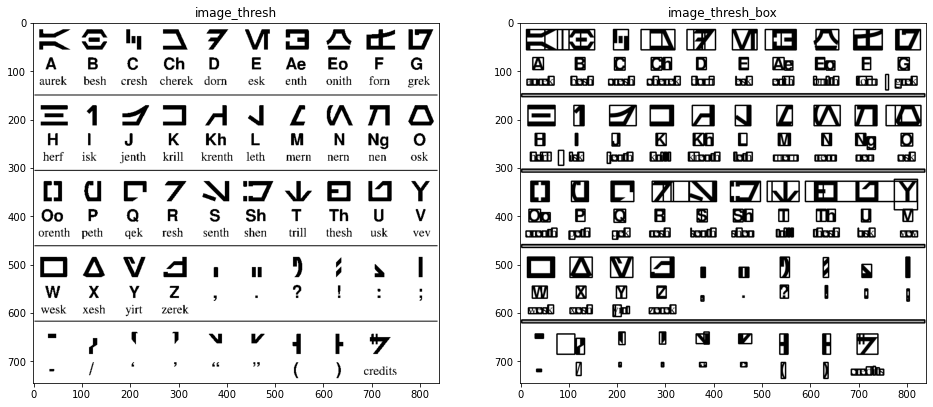

In [11]:
h, w = image_thresh.shape
boxes = pytesseract.image_to_boxes(image_thresh) 
image_thresh_box = np.copy(image_gray)
for b in boxes.splitlines():
    b = b.split(' ')
    image_thresh_box = cv2.rectangle(image_thresh_box, (int(b[1]), h - int(b[2])), 
                              (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

############################################################
plt_view_image(plt,[["image_thresh",image_thresh],
                    ["image_thresh_box",image_thresh_box]],
               figsize=(16,8), axis='on', cmap='gray')

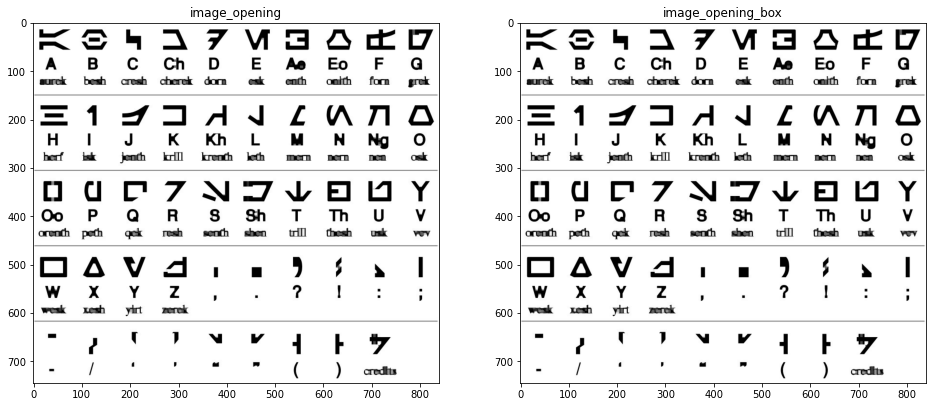

In [12]:
h, w = image_opening.shape
boxes = pytesseract.image_to_boxes(image_opening) 
image_opening_box = np.copy(image_opening)
for b in boxes.splitlines():
    b = b.split(' ')
    image_opening_box = cv2.rectangle(image_opening_box, (int(b[1]), h - int(b[2])), 
                              (int(b[3]), h - int(b[4])), (255,0,0), 2)

############################################################
plt_view_image(plt,[["image_opening",image_opening],
                    ["image_opening_box",image_opening_box]],
               figsize=(16,8), axis='on', cmap='gray')

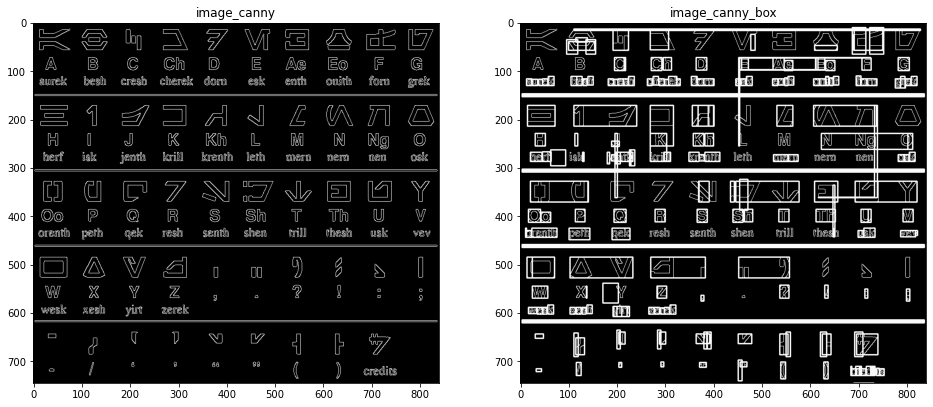

In [13]:
h, w = image_canny.shape
boxes = pytesseract.image_to_boxes(image_canny) 
image_canny_box = np.copy(image_canny)
for b in boxes.splitlines():
    b = b.split(' ')
    image_canny_box = cv2.rectangle(image_canny_box, (int(b[1]), h - int(b[2])), 
                              (int(b[3]), h - int(b[4])), (250), 2)

############################################################
plt_view_image(plt,[["image_canny",image_canny],
                    ["image_canny_box",image_canny_box]],
               figsize=(16,8), axis='on', cmap='gray')

------  img----------------------    Shape(600, 800, 3) img: uint8
[ [42 22 35] [45 26 41] [44 29 50] [35 22 44] [31 16 37] [30 15 36] [34 19 40] ]
[ [43 23 36] [55 36 53] [48 32 55] [42 28 52] [39 23 46] [36 20 43] [35 19 42] ]
[ [46 25 40] [46 27 44] [40 24 47] [40 27 51] [35 22 44] [28 15 37] [35 22 44] ]
[ [50 29 44] [49 31 48] [40 28 48] [37 25 47] [32 20 40] [26 14 34] [29 17 37] ]
[ [47 25 43] [45 27 44] [40 29 45] [32 25 40] [30 20 36] [31 21 37] [31 21 37] ]
[ [39 17 35] [35 18 32] [40 30 42] [33 28 37] [40 32 43] [49 41 52] [45 37 48] ]
[ [39 17 35] [36 19 33] [44 36 43] [44 41 43] [55 51 56] [63 59 64] [55 49 54] ]
[ [49 27 45] [48 31 44] [51 44 47] [57 55 54] [69 67 66] [68 66 65] [53 48 49] ]
[ [57 35 54] [59 42 55] [52 48 47] [64 67 58] [74 74 68] [64 64 58] [45 44 40] ]
[ [56 36 55] [58 44 56] [51 46 45] [70 67 62] [77 74 69] [60 57 53] [44 40 39] ]


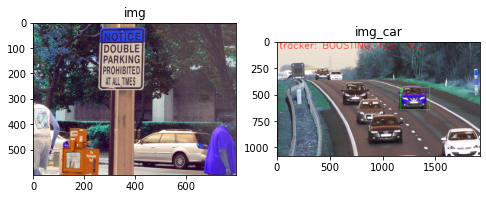

In [14]:
img = cv2.imread('../data/scenetext01.jpg')
img_car = cv2.imread('frameBOOSTING.png')



###########################################################
print_image('img','img',img,118,128,190,197)
plt_view_image(plt,[["img",img],["img_car",img_car]],figsize=(8,8), axis='on', cmap='gray')
# Display digits image
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
textSpotter = cv2.text.TextDetectorCNN_create("data/textbox.prototxt", 
                                              "data/TextBoxes_icdar13.caffemodel")
print(textSpotter)
rects, outProbs = textSpotter.detect(img);

det = cv2.text.TextDetectorCNN_create("data/textbox.prototxt", 
                                      "data/TextBoxes_icdar13.caffemodel")
print(det)
rects, probs = det.detect(img)

In [ ]:
THR = 0.3
for i, r in enumerate(rects):
    if probs[i] > THR:
        cv2.rectangle(img, (r[0], r[1]), (r[0]+r[2], r[1]+r[3]), (0, 255, 0), 2)

In [ ]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()

[Text Detection and Extraction using OpenCV and OCR](https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/)

[A comprehensive guide to OCR with Tesseract, OpenCV and Python](https://nanonets.com/blog/ocr-with-tesseract/)

[Pytesseract : “TesseractNotFound Error: tesseract is not installed or it's not in your path”, how do I fix this?](https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i)



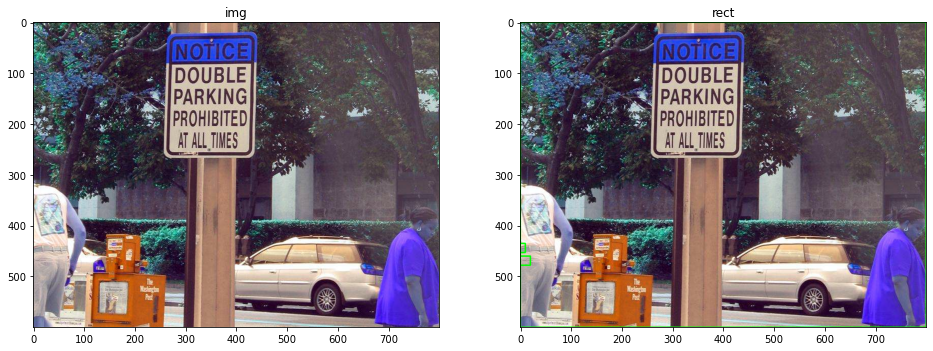

In [15]:
# Import required packages 
import pytesseract 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


# Mention the installed location of Tesseract-OCR in your system 
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

# Read image from which text needs to be extracted 
#img = cv2.imread("sample.jpg") 
#img = cv2.imread('../data/scenetext01.jpg')
img = cv2.imread('../data/scenetext01.jpg')

# Preprocessing the image starts 

# Convert the image to gray scale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Performing OTSU threshold 
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

# Specify structure shape and kernel size. 
# Kernel size increases or decreases the area 
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect 
# each word instead of a sentence. 
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 

# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

# Creating a copy of image 
im2 = img.copy() 

# A text file is created and flushed 
#file = open("recognized.txt", "w+") 
#file.write("") 
#file.close() 

# Looping through the identified contours 
# Then rectangular part is cropped and passed on 
# to pytesseract for extracting text from it 
# Extracted text is then written into the text file 
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    #print(rect)
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 

    # Open the file in append mode 
    #file = open("recognized.txt", "a") 
    
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
    print(text)
    # Appending the text into file 
    #file.write(text) 
    #file.write("\n") 
    # Close the file 
    #file.close 

###########################################################
plt_view_image(plt,[["img",img],["rect",rect]],figsize=(16,8), axis='on', cmap='gray')
# Display digits image
cv2.imshow('img, img', np.hstack([img, rect]))
cv2.waitKey()
cv2.destroyAllWindows()